In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)



In [ ]:
#Load dataset and check top and bottom 5 rows

dataset = pd.read_csv('Country-data.csv')
dataset.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
dataset.tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
#Check the different types of data present
#Data is all numerical, no vector binary conversion needed
#Makes it simple to make a model
dataset.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
#Replaces any missing value with mean
#From scanning the data no missing data found however best to replace with mean just in case
dataset['child_mort'].fillna(value=dataset['child_mort'].mean(), inplace = True)
dataset['exports'].fillna(value=dataset['exports'].mean(), inplace = True)
dataset['health'].fillna(value=dataset['health'].mean(), inplace = True)
dataset['imports'].fillna(value=dataset['imports'].mean(), inplace = True)
dataset['income'].fillna(value=dataset['income'].mean(), inplace = True)
dataset['inflation'].fillna(value=dataset['inflation'].mean(), inplace = True)
dataset['life_expec'].fillna(value=dataset['life_expec'].mean(), inplace = True)
dataset['total_fer'].fillna(value=dataset['total_fer'].mean(), inplace = True)

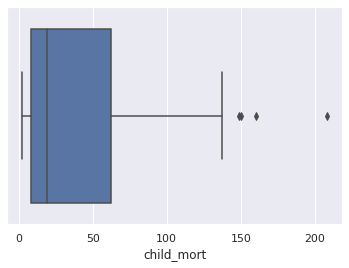

In [ ]:
#Detecting outliers
#Outliers cannot be removed as whole row would have to remove
#Replacing with mean values would affect the clustering but would remove skewness
#K-means not as affected by outliers, not significant if left in
#Countries naturally have vast differences, removing 'outliers' would make results untrue
#Significant wealth gap in countries
sns.boxplot(x = dataset['child_mort'])

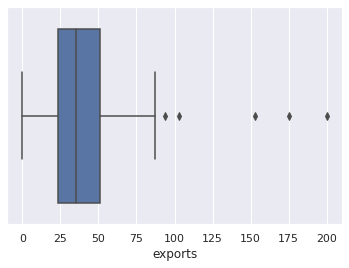

In [ ]:
sns.boxplot(x = dataset['exports'])

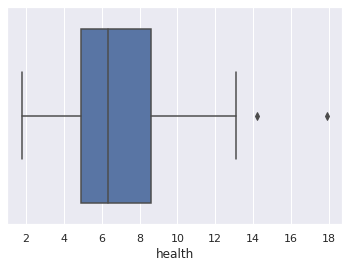

In [ ]:
sns.boxplot(x = dataset['health'])

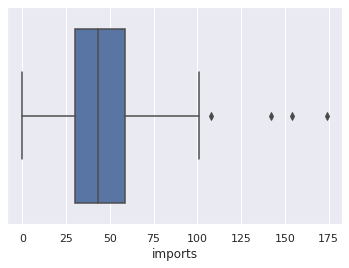

In [ ]:
sns.boxplot(x = dataset['imports'])

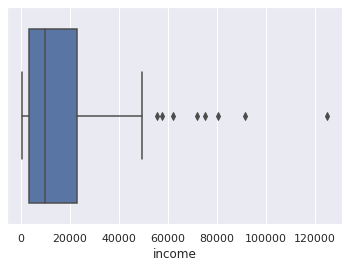

In [ ]:
sns.boxplot(x = dataset['income'])

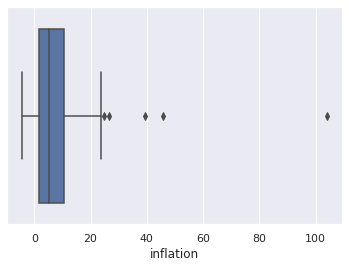

In [ ]:
sns.boxplot(x = dataset['inflation'])

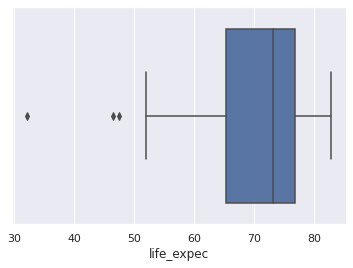

In [ ]:
sns.boxplot(x = dataset['life_expec'])

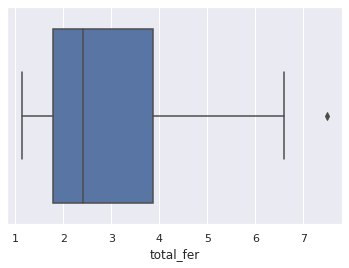

In [ ]:
sns.boxplot(x = dataset['total_fer'])

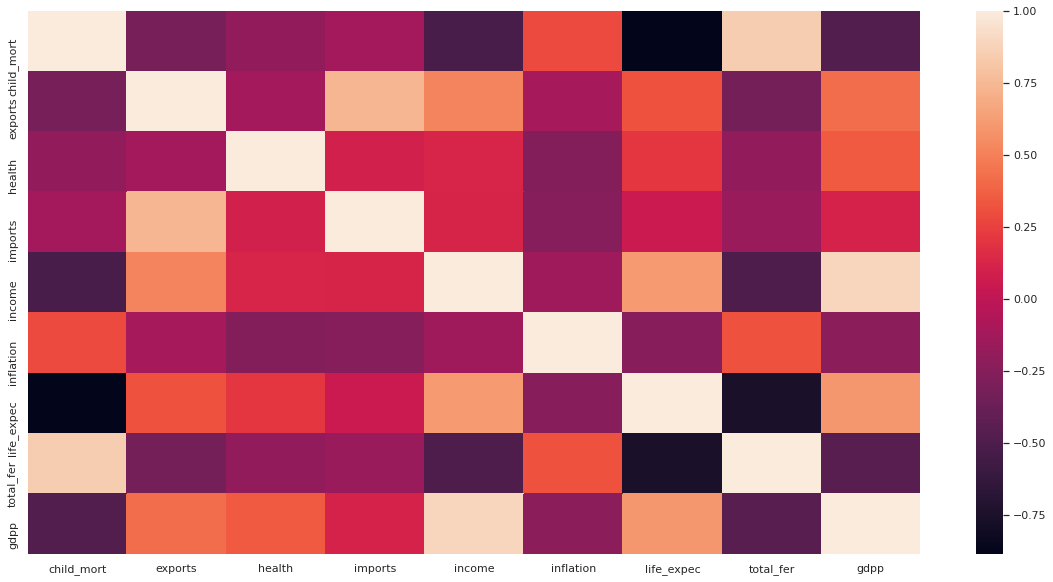

In [ ]:
#Heat maps here are used to find the relationship between fratures
#Features with overly high correlation should be dropped
#Likely features such as GDP and average earning to be related

# Finding the relations between the variables
# No correlation is unusually strong, all lined down the middle
# Almost all correlation index below 0.75
# From chart highest correlations are between total_fer and child_mort
# also gdp and income
# possibly best to remove features gdp and or income due to such a high correlation
# data will be run again without these features to explore change in clustering
plt.figure(figsize=(20,10))
c = dataset.corr()
feature_correlation = sns.heatmap(c)


In [ ]:
# GDP and income has relatively high correlation
# child_mort and total_fert has relatively high correlation
# important to drop these columns for reliability of model
new_data = dataset.drop(['income', 'child_mort'], axis = 1)
new_data

,country,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,Afghanistan,10.0,7.58,44.9,9.44,56.2,5.82,553
1,Albania,28.0,6.55,48.6,4.49,76.3,1.65,4090
2,Algeria,38.4,4.17,31.4,16.10,76.5,2.89,4460
3,Angola,62.3,2.85,42.9,22.40,60.1,6.16,3530
4,Antigua and Barbuda,45.5,6.03,58.9,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...
162,Vanuatu,46.6,5.25,52.7,2.62,63.0,3.50,2970
163,Venezuela,28.5,4.91,17.6,45.90,75.4,2.47,13500
164,Vietnam,72.0,6.84,80.2,12.10,73.1,1.95,1310
165,Yemen,30.0,5.18,34.4,23.60,67.5,4.67,1310


In [ ]:
#SELECTING FEATURES USED FOR CLUSTER MODEL

X = new_data.iloc[:, [1, 2, 3, 4, 5, 6, 7 ]].values #Select column index 1 and 7
#Excludes column where countries are listed
#It has no impact on whatever independant variable that will be created 
#Goal is to Identifies clusters and creates new dependant variable where the values will be clusters 


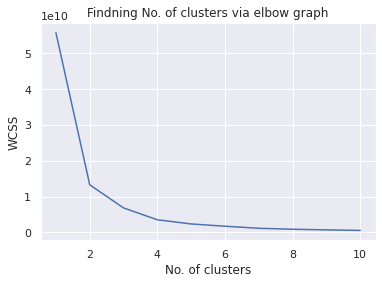

In [ ]:
#USING ELBOW METHOD TO FIND BEST NO. OF CLUSTERS
#optimum change in WCSS is no longer significant
#Scikit learn library already runs this 

from sklearn.cluster import KMeans
#for loop to run clusters 1-10 to see what is best
#Looking for best "within cluster sum of squares"
WCSS = [] #make empty list for wcss val
for i in range(1, 11): 
  #want to include 10 but go up to 11
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42 )
  #avoids random initialisation trap with ++
  #Then train K means with i number of clusters
  kmeans.fit(X) #fit X data into kmeans, only need data of the features no labelling 
  WCSS.append(kmeans.inertia_) #append new value into this list, call attribute of kmeans object
  #get WCSS value

plt.plot(range(1, 11), WCSS)
plt.title('Findning No. of clusters via elbow graph')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

#WCSS decreases its descent at  hence use 3 clusters
#Optimal number is 3

In [ ]:
#TRAINING THE KMEANS MODEL ON DATASET USING OPTIMAL NUMBER OF CLUSTERS

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42 )
ypredict_kmeans = kmeans.fit_predict(X)
#build dependant variable where the values are the clusters
print(ypredict_kmeans)
#Which cluster each country belongs to listed below
#Noticable that countries in cluster '1' have GDP ranking 12000 or below
#Countries in cluster '0' have GDPs ranking higher than most countries
#Highest GDP ranked countries are in cluster '2'
#The same pattern is observable in regards to life exectancy
#only countrues in cluster 0 and 2 usually have life expectancy above 80

[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


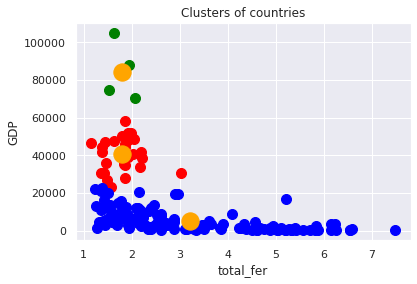

In [ ]:
#VISIALISE THE CLUSTERS ON A GRAPH AND THEIR CENTRIODS

plt.scatter(
    X[ypredict_kmeans == 0,5], # Cluster 0, index 0 of X
    X[ypredict_kmeans == 0,6], # Cluster 0, index 1 of X
    s = 100, c = 'red', label = 'cluster 1') 

plt.scatter(
    X[ypredict_kmeans == 1,5], # Cluster 1, index 0 of X
    X[ypredict_kmeans == 1,6], # Cluster 1, index 1 of X
    s = 100, c = 'blue', label = 'cluster 2') 

plt.scatter(
    X[ypredict_kmeans == 2,5], # Cluster 2, index 0 of X
    X[ypredict_kmeans == 2,6], # Cluster 2, index 1 of X
    s = 100, c = 'green', label = 'cluster 3') 

#plt.scatter(
    #X[ypredict_kmeans == 3,5], # Cluster 3, index 0 of X
    #X[ypredict_kmeans == 3,6], # Cluster 3, index 1 of X
    #s = 100, c = 'yellow', label = 'cluster 4') 


#plotting the centriods
plt.scatter(kmeans.cluster_centers_[:, 5], 
            kmeans.cluster_centers_[:, 6], 
            s = 300, c = 'orange', label = 'centriods')




#Natural bias as I understand that countries with very high GDP have lower birthrate
#This finding/trend could be verified by using another clustering model
#alternative look at trend in the data

plt.title('Clusters of countries')
plt.xlabel('total_fer')
plt.ylabel('GDP')
plt.show()

In [ ]:
#Pickling the K means object
#filename = pickle_path+'\\'+'_ypredict_kmeans.sav'
import pandas
from sklearn import model_selection
import pickle


In [ ]:
#Save K-Means model and use for future prediction

from sklearn.cluster import KMeans
from sklearn.externals import joblib
kmeans.fit(X)
joblib.dump(kmeans, 'kmeans.pkl')
kmeans_loaded = joblib.load('kmeans.pkl')

kmeans_loaded

#predict with new data

kmeans_loaded.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = kmeans
model.fit(X)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)
print(result)

[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]
